In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from haggis.math import full_width_half_max
import matplotlib.transforms as tfrms

0.021007851529220467


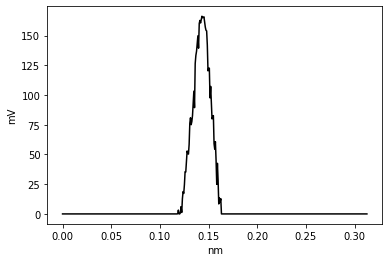

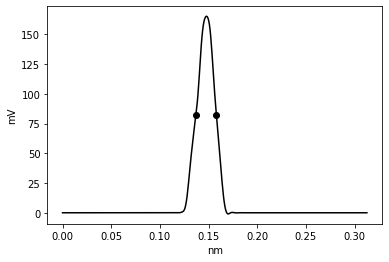

In [9]:
listedesresolution = []

def analyse(données):
    filename = données
    data = np.loadtxt(filename, delimiter='\t', skiprows=4, dtype=float)

    data = np.array(data)

    l = np.size(data)

    t = np.arange(0,l*16.6e-3, 16.6e-3)

    x = data[:,0]
    y = data[:,1]

    x = np.array(x)/10
    dx = data[int(l/3-1)][0]- data[0][0]
    x2 = np.linspace(0,dx,int(l/3))
    fig2 = plt.figure()
    plt.plot(x2,y*1000,'k')
    plt.xlabel('nm')
    plt.ylabel('mV')
    plt.savefig(filename+'brut.jpg', dpi = 900)
    t = np.arange(0,(l*16.6e-3)/3, 16.6e-3)
 
    sos = signal.butter(5, 5, 'lp', fs=60, output='sos')

    filtered = signal.sosfilt(sos, y)

    fi3 = plt.figure()
    
    fwhm, (x1, y1), (x3, y3) = full_width_half_max(x2, filtered, return_points=True)
    print(fwhm)
    listedesresolution.append((filename,fwhm,dx, filtered, (x1, y1), (x3, y3)))

    plt.plot(x2, filtered*1000, 'k')
    plt.plot(x1, y1*1000, 'ko')
    plt.plot(x3, y3*1000, 'ko')
    plt.xlabel('nm')
    plt.ylabel('mV')
    plt.savefig(filename+'filtre.jpg', dpi = 900)
analyse('datatoanalyse/base19mai')

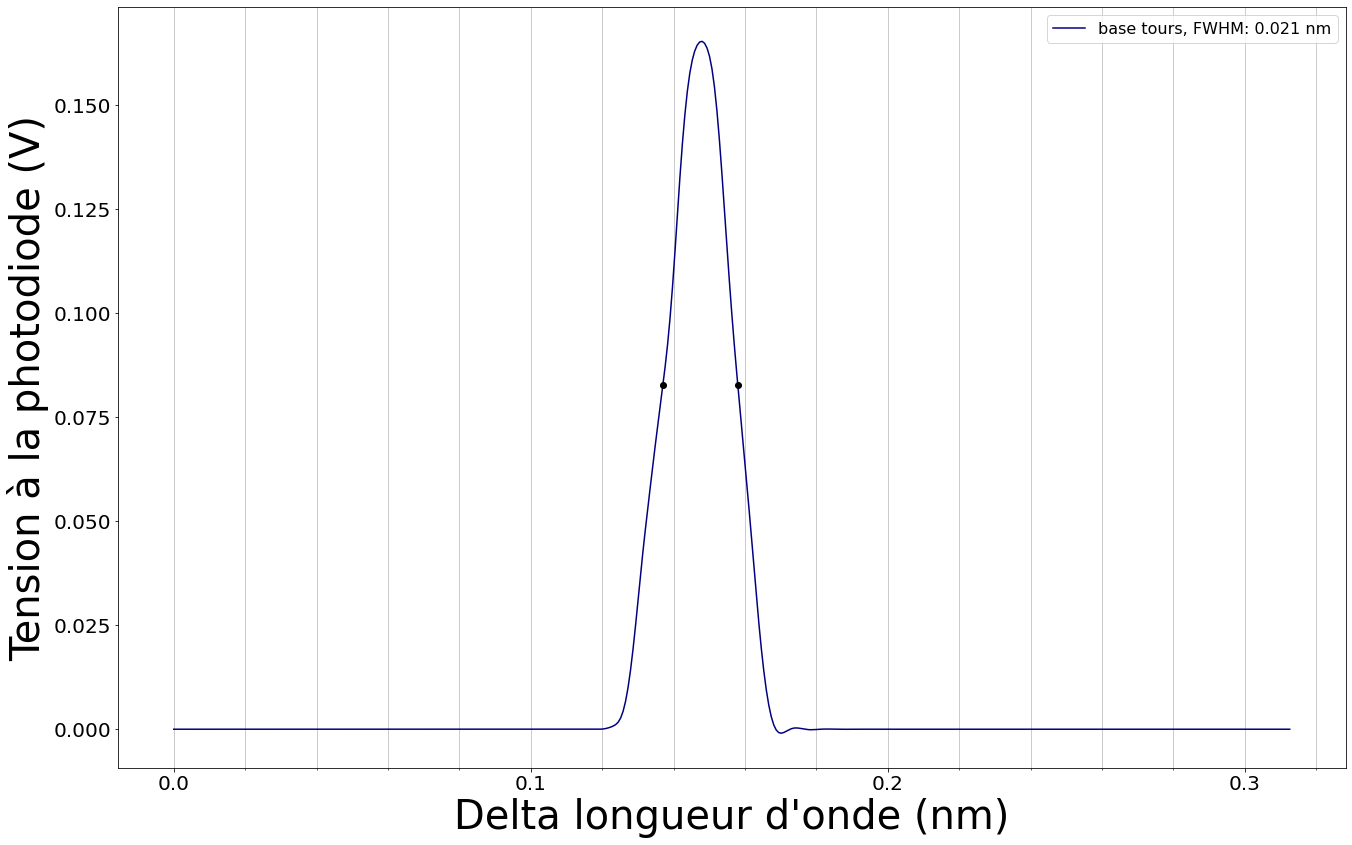

In [12]:
res = np.array(listedesresolution, dtype=object)
res = sorted(res, key = lambda x: x[1])  
i = 0
cm = plt.get_cmap('jet')
delta = 0.1

figure = plt.figure()
figure.set_size_inches(22, 14, forward=True)
for p in res:
    l = np.size(p[3])
    x = np.linspace(0,p[2],int(l))+delta*i
    plt.plot(x, p[3], color = cm([i*25]), label = p[0].replace('datatoanalyse/','').replace('.txt','').replace('sur','/')[:-5]+' tours' +', FWHM: '+str(round(p[1], 4))+' nm')
    plt.plot(p[4][0]+delta*i, p[4][1], 'ko')
    plt.plot(p[5][0]+delta*i, p[5][1], 'ko')
    i += 1

plt.xlabel("Delta longueur d'onde (nm)")
plt.ylabel("Tension à la photodiode (V)")
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=40)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.rc('grid', linestyle="--", color='black')
plt.grid(visible=True, which='major', axis= 'x', color='k', alpha= 0.25, linestyle='-')
plt.grid(visible=True, which='minor', axis= 'x', color='k', alpha= 0.25, linestyle='-')
plt.legend()
plt.savefig('test résolution.jpg', dpi=600)
plt.show() 

